# Load Data

In [4]:
#download the data at Kaggle Housing Data - https://www.kaggle.com/justinas/housing-in-london 
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

London_data_monthly_keep = pd.read_csv(open('housing_in_london_monthly_variables.csv', 'r')) #do not touch London_data_monthly_keep so that we do not have to reload the data every time we make a mistake
London_data_yearly = pd.read_csv(open('housing_in_london_yearly_variables.csv', 'r'))
London_data_monthly = London_data_monthly_keep

# Explore Data

In [2]:
London_data_monthly.head(10)
London_data_monthly.info()
London_data_monthly.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [3]:
London_data_yearly.head()
# London_data_yearly.info()
London_data_yearly.isnull().sum() #many more nulls, lets just use the monthly data

code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

# Clean Data

1. Remove NaNs by using mean of category using the transform column
2. Fix Area and Date so that they are Floats or Integers
3. 

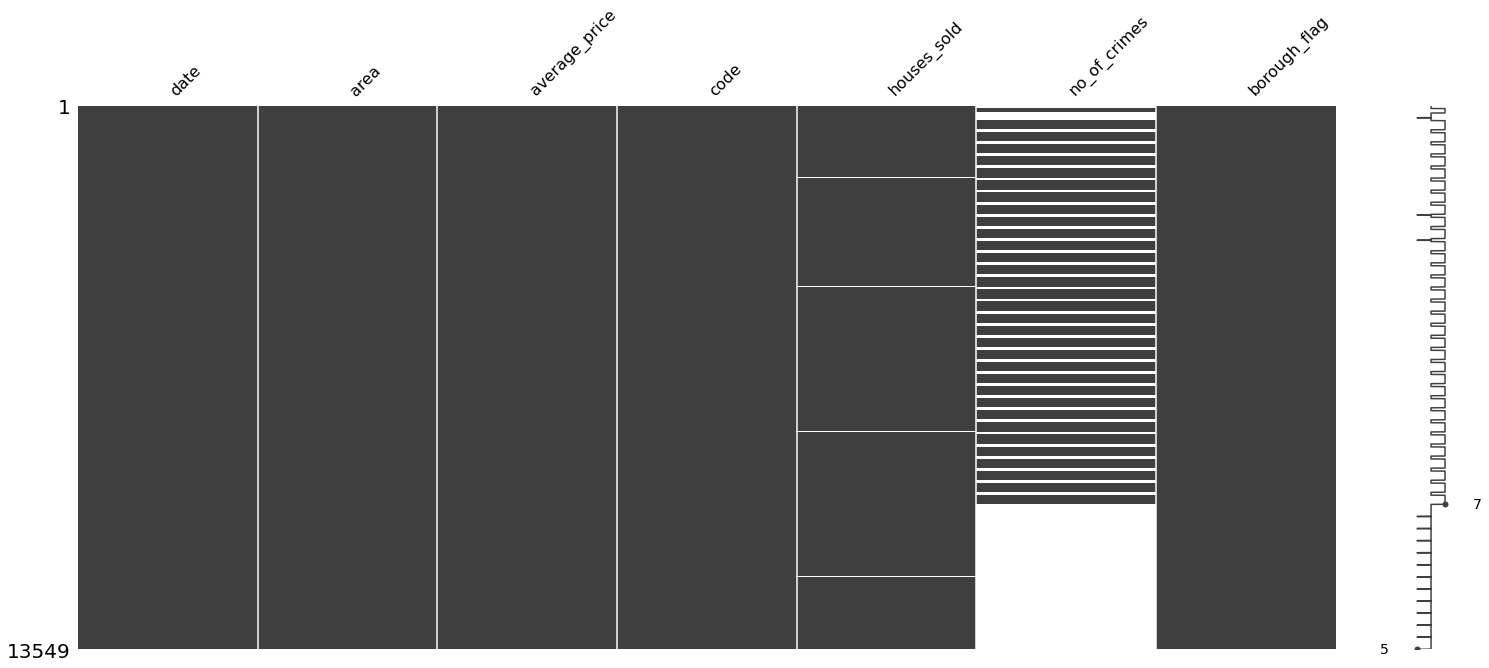

In [4]:
import missingno as msno

msno.matrix(London_data_monthly)

#inspired by https://github.com/ResidentMario/missingno#matrix 

 ##### You can clearly see that no_of_crimes is generally not well populated. Furthermore, you can see that it is not populated towards the end.  Another item to note is the houses_sold has a few missing values, we can either remove these or insert the median house price within that area. 

In [5]:
London_data_monthly[['area',"no_of_crimes"]].tail(15)

,area,no_of_crimes
13534,england,NaN
13535,england,NaN
13536,england,NaN
13537,england,NaN
13538,england,NaN
13539,england,NaN
13540,england,NaN
13541,england,NaN
13542,england,NaN
13543,england,NaN


In [6]:
#Take the average no of crimes
x = London_data_monthly["no_of_crimes"].mean()
London_data_monthly = London_data_monthly.fillna({'no_of_crimes' : x})

In [7]:
# London_data_monthly["houses_sold"] = 
# x= London_data_monthly['houses_sold'].transform(lambda x: x.fillna(x.mean()))
#x - always use a local variable to change your data. Do not change or transform your data directly, otherwise, 
# you will have to load again. If the data is large or is connected to an API then you'll be sitting around each time you
# F*ck up. 


London_data_monthly['houses_sold']= London_data_monthly.groupby("area")['houses_sold'].transform(lambda x: x.fillna(x.mean()))

In [8]:
London_data_monthly.info()
London_data_monthly.isnull().sum() #still ned to fix houses_sold

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13549 non-null  float64
 5   no_of_crimes   13549 non-null  float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

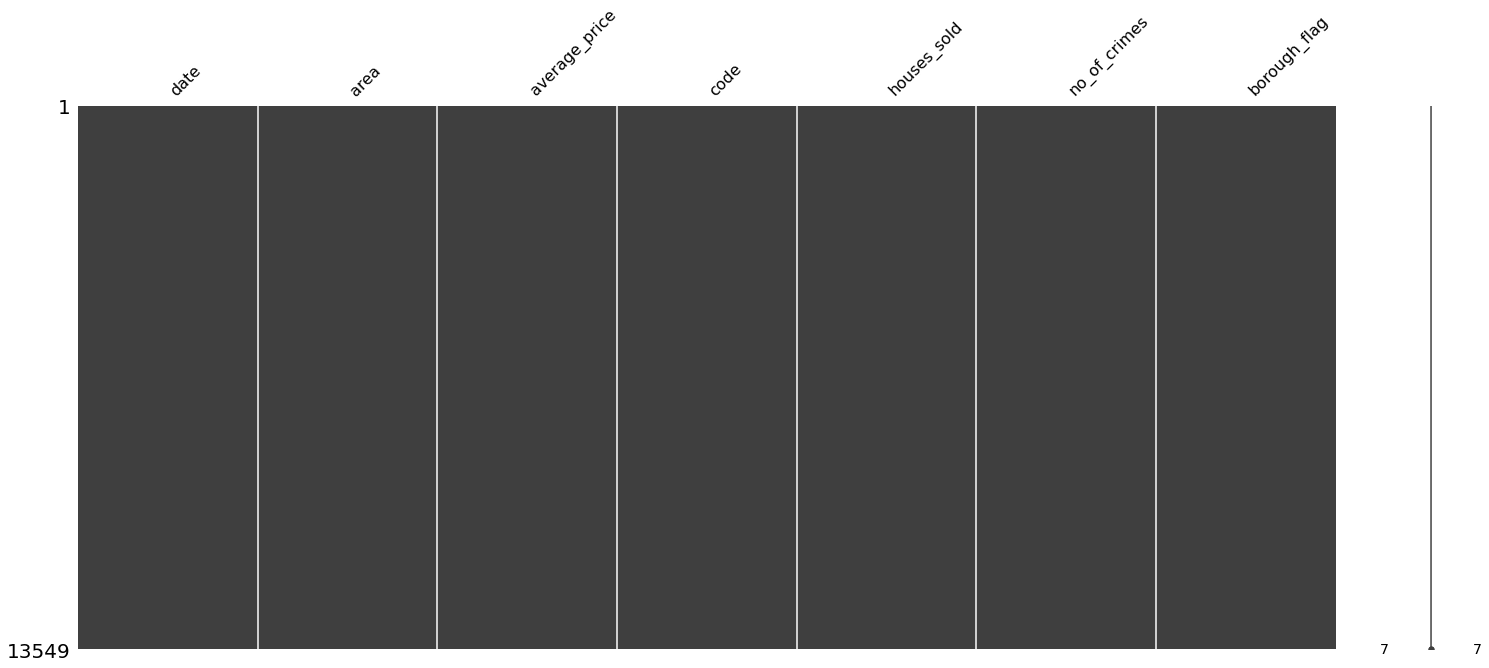

In [9]:
msno.matrix(London_data_monthly)

### Now that all the missing values have been inserted into the data, we now need to fix the cateogorical features such as Date, Area and Code

In [10]:
London_data_monthly[['code', 'area']].tail(10)
print(London_data_monthly['code'].value_counts())

print(London_data_monthly['area'].value_counts())

#Both features appear to be the same, so let's remove 1 to avoid problems down the road.  

E09000012    302
E09000010    302
E12000008    302
E09000030    302
E13000002    301
E09000003    301
E09000004    301
E12000004    301
E09000029    301
E09000027    301
E09000008    301
E13000001    301
E09000013    301
E09000031    301
E09000015    301
E09000017    301
E12000001    301
E09000025    301
E09000022    301
E09000024    301
E09000026    301
E09000002    301
E09000033    301
E12000005    301
E09000019    301
E09000021    301
E92000001    301
E09000005    301
E09000011    301
E09000016    301
E09000032    301
E09000007    301
E12000007    301
E12000003    301
E09000028    301
E09000023    301
E12000009    301
E09000009    301
E12000006    301
E12000002    301
E09000020    301
E09000014    301
E09000006    301
E09000018    301
E09000001    301
Name: code, dtype: int64
hackney                   302
tower hamlets             302
south east                302
enfield                   302
wandsworth                301
north east                301
islington                 301


In [11]:
London_data_monthly=London_data_monthly.drop('code', axis=1)
London_data_monthly #drop code column

,date,area,average_price,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,17.000000,2158.352063,1
1,1995-02-01,city of london,82203,7.000000,2158.352063,1
2,1995-03-01,city of london,79121,14.000000,2158.352063,1
3,1995-04-01,city of london,77101,7.000000,2158.352063,1
4,1995-05-01,city of london,84409,10.000000,2158.352063,1
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,64605.000000,2158.352063,0
13545,2019-10-01,england,249376,68677.000000,2158.352063,0
13546,2019-11-01,england,248515,67814.000000,2158.352063,0
13547,2019-12-01,england,250410,77182.732441,2158.352063,0


#### Now that the code column has been dropped, let's try Label the categorical values using OneHoteEncoder
We will then use PCA to reduce the dimensions and then apply our models to determine the average_price. 

#### But before we do that, lets group the date by year instead of month and date. 

In [12]:
London_data_monthly['date']

0        1995-01-01
1        1995-02-01
2        1995-03-01
3        1995-04-01
4        1995-05-01
            ...    
13544    2019-09-01
13545    2019-10-01
13546    2019-11-01
13547    2019-12-01
13548    2020-01-01
Name: date, Length: 13549, dtype: object

In [13]:
London_data_monthly['date'] = London_data_monthly['date'].str.extract(r'(^\d{4})', expand=False) #only group by year

In [14]:
London_data_monthly['date'].value_counts().sort_values(ascending=False)

1998    542
1996    542
1997    540
2013    540
2018    540
2009    540
2016    540
2015    540
2000    540
2003    540
2010    540
2012    540
1999    540
1995    540
2008    540
2005    540
2019    540
2017    540
2004    540
2011    540
2014    540
2006    540
2007    540
2002    540
2001    540
2020     45
Name: date, dtype: int64

In [15]:
London_data_monthly['date']= London_data_monthly['date'].astype(dtype= 'int')
London_data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  int32  
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   houses_sold    13549 non-null  float64
 4   no_of_crimes   13549 non-null  float64
 5   borough_flag   13549 non-null  int64  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 582.3+ KB


In [16]:
London_data_monthly['area'][1000:1500] #using label encoder will cause relationships between area1 and area2 when there
#is no relationship so we have to use OneHotEncoder

1000    bexley
1001    bexley
1002    bexley
1003    bexley
1004    bexley
1005    bexley
1006    bexley
1007    bexley
1008    bexley
1009    bexley
1010    bexley
1011    bexley
1012    bexley
1013    bexley
1014    bexley
1015    bexley
1016    bexley
1017    bexley
1018    bexley
1019    bexley
1020    bexley
1021    bexley
1022    bexley
1023    bexley
1024    bexley
1025    bexley
1026    bexley
1027    bexley
1028    bexley
1029    bexley
1030    bexley
1031    bexley
1032    bexley
1033    bexley
1034    bexley
1035    bexley
1036    bexley
1037    bexley
1038    bexley
1039    bexley
1040    bexley
1041    bexley
1042    bexley
1043    bexley
1044    bexley
1045    bexley
1046    bexley
1047    bexley
1048    bexley
1049    bexley
1050    bexley
1051    bexley
1052    bexley
1053    bexley
1054    bexley
1055    bexley
1056    bexley
1057    bexley
1058    bexley
1059    bexley
1060    bexley
1061    bexley
1062    bexley
1063    bexley
1064    bexley
1065    bexley
1066    be

In [9]:
# Now we need to convert Area using One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

area_one_hot = one_hot.fit_transform(London_data_monthly[['area']])
area_one_hot

<13549x45 sparse matrix of type '<class 'numpy.float64'>'
	with 13549 stored elements in Compressed Sparse Row format>

In [10]:
one_hot.categories_

[array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
        'camden', 'city of london', 'croydon', 'ealing', 'east midlands',
        'east of england', 'enfield', 'england', 'greenwich', 'hackney',
        'hammersmith and fulham', 'haringey', 'harrow', 'havering',
        'hillingdon', 'hounslow', 'inner london', 'islington',
        'kensington and chelsea', 'kingston upon thames', 'lambeth',
        'lewisham', 'london', 'merton', 'newham', 'north east',
        'north west', 'outer london', 'redbridge', 'richmond upon thames',
        'south east', 'south west', 'southwark', 'sutton', 'tower hamlets',
        'waltham forest', 'wandsworth', 'west midlands', 'westminster',
        'yorks and the humber'], dtype=object)]

### Great! Now we know all the steps work so let's create a Class that does all this for us next time

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


class FixLondonMonthlyData(BaseEstimator, TransformerMixin):
    def __init__(self, crime_strategy= 'mean', houses_sold_strategy= 'mean', date_label=True):
        self.crime_strategy = crime_strategy
        self.houses_sold_strategy = houses_sold_strategy
        self.date_label = date_label
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        if self.date_label:
            X['year'] = X['date'].str[:4]
            X['year'] = X['year'].astype(dtype= 'float')
            X = X.drop('date', axis=1)
            X = X.drop('code', axis=1)
        
        if self.crime_strategy == 'mean':
            x_mean = X["no_of_crimes"].mean()
            X = X.fillna({'no_of_crimes' : x_mean})
            
        elif self.crime_strategy == 'median':
            x_median = X["no_of_crimes"].median()
            X = X.fillna({'no_of_crimes' : x_median})
        
        if self.houses_sold_strategy == 'mean':
            X['houses_sold']= X['houses_sold'].transform(lambda x: x.fillna(x.mean()))
            
        elif self.houses_sold_strategy == 'mean':
            X['houses_sold']= X['houses_sold'].transform(lambda x: x.fillna(x.median()))
        
        return X

In [12]:
fix_london = FixLondonMonthlyData()

london_fixed = fix_london.fit_transform(London_data_monthly_keep)
london_fixed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           13549 non-null  object 
 1   average_price  13549 non-null  int64  
 2   houses_sold    13549 non-null  float64
 3   no_of_crimes   13549 non-null  float64
 4   borough_flag   13549 non-null  int64  
 5   year           13549 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 635.2+ KB


###  Now that we have a Class that fixes the data, let's create a Pipeline
First let's seperate our data where price is y and the remaining data are features, X.

I also added in StandardScaler as this will help scale our features, you should always scale your features because ML models tend to perform better this way.

In [13]:
y = London_data_monthly_keep['average_price']
X = London_data_monthly_keep.drop(['average_price'], axis=1)
# std_X = StandardScaler().fit_transform(X)
fix_london.fit_transform(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          13549 non-null  object 
 1   houses_sold   13549 non-null  float64
 2   no_of_crimes  13549 non-null  float64
 3   borough_flag  13549 non-null  int64  
 4   year          13549 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 529.4+ KB


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#create a pipeline for the number Columns
num_pipeline = Pipeline(steps=[
    ('Fix_London_data', FixLondonMonthlyData(crime_strategy= 'mean', houses_sold_strategy= 'mean', date_label=True)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('cat', OneHotEncoder())
])


#identify which columns are numbers vs categories 
num_attribs = ['date', 'code', 'houses_sold','no_of_crimes','borough_flag']
cat_attribs = ['area']

#combine the pipelines into a single transformer
full_pipeline = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(X)
housing_prepared

<13549x49 sparse matrix of type '<class 'numpy.float64'>'
	with 61635 stored elements in Compressed Sparse Row format>

# Split into Test and Train (plus validation)

In [15]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(housing_prepared, y, test_size= 1355, random_state=42) #split 10% of data into test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 1355, random_state=42)

# Investigate best Model to predict House Prices

1. regression problem with y as the prices of houses

2. Use PCA and plot scatter graph of best features and see what you get 



In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_val)

MSE= mean_squared_error(y_val, y_pred= y_pred_linear)
RMSE = np.sqrt(MSE)
RMSE

75236.23307055759

#### Linear Regression does seem like the right option here - only £75k off - but far from ideal. You would think that Housing prices have linear relation. Let's experiement with more models, let's apply Elastic Net. 

<i>Never use just vanilla LinearRegression always apply some sort of regularization</i>

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'alpha': [0.7, 1, 1.3, 1.9], 'l1_ratio' : [0.4, 0.5, 0.6]}
]

elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv= 3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1, return_train_score=False)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.2s finished


GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid=[{'alpha': [0.7, 1, 1.3, 1.9],
                          'l1_ratio': [0.4, 0.5, 0.6]}],
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
y_pred_grid = grid_search.predict(X_val)

MSE_grid = mean_squared_error(y_val,y_pred= y_pred_grid)

RMSE = np.sqrt(MSE_grid)
RMSE

124470.4789083677

## WOW! It's even worse! Not a great result, £125k off the validation instances. It seems like we are overfitting the data. Let's try another model but let's see how the Polynomial degree influences the RMSE.


### Specifcally, Suport Vector Machine with a Poly Kernel. 

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'degree': [3, 4, 6], 'C' : [0.9, 1, 3]}
]

svr = SVR(kernel= 'poly')

grid_search = GridSearchCV(svr, param_grid, cv= 3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1, return_train_score=False)

grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   50.2s finished


GridSearchCV(cv=3, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid=[{'C': [0.9, 1, 3], 'degree': [3, 4, 6]}],
             scoring='neg_mean_squared_error', verbose=1)

In [28]:
y_pred_svr = grid_search.predict(X_val)

MSE_svr = mean_squared_error(y_val, y_pred= y_pred_svr)

RMSE = np.sqrt(MSE_svr)
RMSE

188134.82351799108

In [29]:
grid_search.best_estimator_

SVR(C=3, degree=6, kernel='poly')

### Results are getting worse with Polynomial. So let's try an Ensemble model - Random Forest Regressor. The results where better! So I fine tuned the model to by changing the hyper parameter values.

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
params_grid = [
    {'n_estimators': [195, 200, 210], 'max_features' : [32, 34, 38]}
]

grid_search_forest = GridSearchCV(forest_reg, params_grid, cv= 3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1, return_train_score=False)

grid_search_forest.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.2min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [32, 34, 38],
                          'n_estimators': [195, 200, 210]}],
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
y_pred_forest = grid_search_forest.predict(X_val)

MSE_forest = mean_squared_error(y_val, y_pred= y_pred_forest)

RMSE_forest = np.sqrt(MSE_forest)
RMSE_forest

13364.976769011379

In [32]:
grid_search_forest.best_params_

{'max_features': 38, 'n_estimators': 195}

In [33]:
np.sqrt(-grid_search_forest.best_score_)
#check the test score just in case you are not over fitting the 


15629.887583403326

# Great! It worked! Let's try another Ensemble Method - XGboost

In [34]:
from xgboost import XGBRegressor

In [35]:
xgb_reg = XGBRegressor(n_jobs=-1, random_state=42)
xgb_reg.fit(X_train, y_train, eval_set= [(X_val, y_val)], early_stopping_rounds= 2)
y_val_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:233877.17188
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:170530.53125
[2]	validation_0-rmse:126917.12500
[3]	validation_0-rmse:97669.46094
[4]	validation_0-rmse:78086.49219
[5]	validation_0-rmse:64587.00781
[6]	validation_0-rmse:56324.34375
[7]	validation_0-rmse:49573.43750
[8]	validation_0-rmse:44787.97266
[9]	validation_0-rmse:41480.84375
[10]	validation_0-rmse:38825.94922
[11]	validation_0-rmse:36946.23828
[12]	validation_0-rmse:35048.08984
[13]	validation_0-rmse:33438.04297
[14]	validation_0-rmse:31994.98047
[15]	validation_0-rmse:31010.95898
[16]	validation_0-rmse:29797.34180
[17]	validation_0-rmse:28615.66211
[18]	validation_0-rmse:27710.14062
[19]	validation_0-rmse:26792.00195
[20]	validation_0-rmse:26294.64258
[21]	validation_0-rmse:25535.66992
[22]	validation_0-rmse:24904.69141
[23]	validation_0-rmse:24268.78125
[24]	validation_0-rmse:23902.69141
[25]	validation_0-rmse:23077.78711
[26]	validation_0-rmse:22328.2617

In [37]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_val, y_val_pred)
np.sqrt(MSE) #just £14k off!!

14313.647584650598

Now for the fun stuff! 

# A Simple Neural Network using Keras
<i>Remember to check, what the input shape is</i>

In [3]:
from tensorflow import keras
import tensorflow as tf

In [17]:
X_train[0].shape

(1, 49)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[49]),
    keras.layers.Dense(400, activation= keras.activations.elu),
    keras.layers.Dense(400, activation= keras.activations.elu),
    keras.layers.Dense(200, activation= keras.activations.elu),
    keras.layers.Dense(1)])

Now that we created a model, so lets train. 

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 400)               20000     
_________________________________________________________________
dense_9 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 260,801
Trainable params: 260,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

In [23]:
model.compile(loss= 'mse', optimizer= keras.optimizers.SGD(lr= 0.001),
              metrics= [keras.metrics.mean_squared_error, keras.metrics.mean_absolute_error])

In [24]:
model.fit(X_train, y_train, epochs=100,
         validation_data=(X_val, y_val), 
         callbacks= [keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100


InvalidArgumentError:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\script_ops.py", line 241, in __call__
    return func(device, token, args)

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\script_ops.py", line 130, in __call__
    ret = self._func(*args)

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 309, in wrapper
    return func(*args, **kwargs)

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 513, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 513, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 511, in slice_array
    return training_utils.slice_arrays(data, ind.numpy(),

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 391, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "c:\users\ashish\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_616]

Function call stack:
train_function


# NEED TO DO: 
#### Due to the Sparse matrix this is not working, I need to figure out how to apply neural networks with a features that are categorical. 

# XGBoost improved the results massively. Let's see if we can can use PCA (TSNE) to plot and see if we can spot any clusters

In [38]:
housing_prepared[::2,]

<6775x49 sparse matrix of type '<class 'numpy.float64'>'
	with 30820 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.manifold import TSNE



tsne = TSNE(n_components=2, random_state=42, n_jobs= -1)
X_reduced = tsne.fit_transform(housing_prepared[::12,])

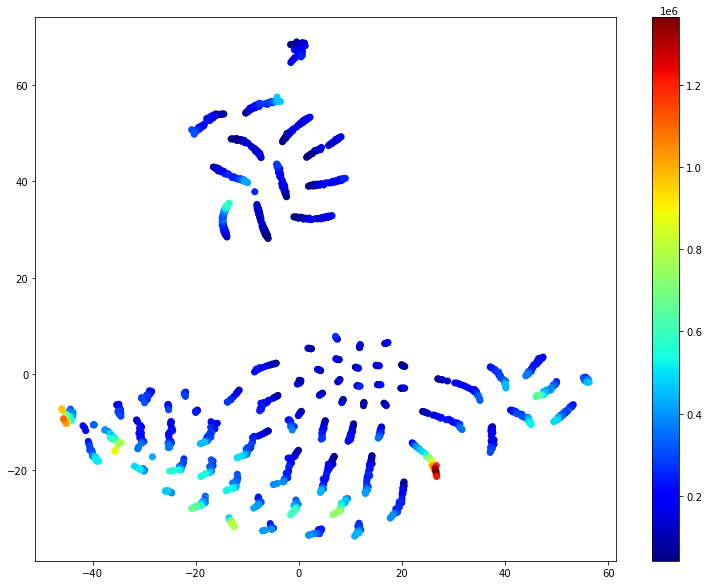

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize= (13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c= y[::12,], cmap='jet')

plt.colorbar()
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline
import matplotlib as mpl

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    
    # Scale input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the areas plotted so far.
    
    neighbors = np.array([[10., 10.]])
    
    # plot figure
    plt.figure(figsize=figsize)
    
    #assign colour
    cmap = mpl.cm.get_cmap("jet")
    
    
    areas = np.unique(y)
    for area in areas:
        plt.scatter(X_normalized[y[::12] == area, 0], X_normalized[y[::12] == area, 1], c=[cmap(area / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[12*index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

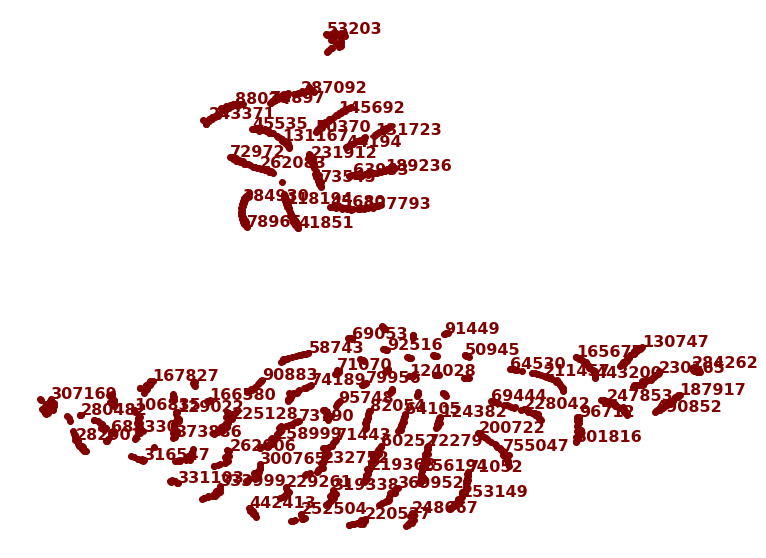

In [42]:
plot_digits(X_reduced, y)

#### Well that didn't work. Let's try something else, we need the labels to be of the Area but the colour to be of the average house price.

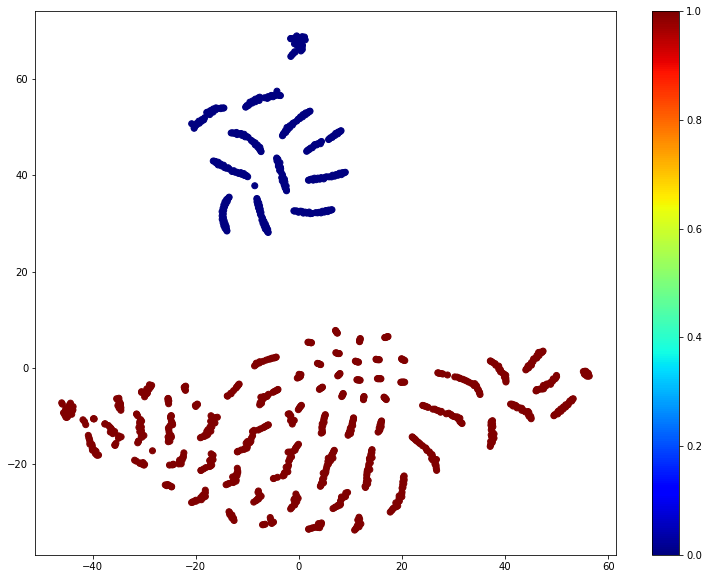

In [43]:
plt.figure(figsize= (13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c= X['borough_flag'][::12,], cmap='jet')

plt.colorbar()
plt.show()

#### This shows what the 2 clusters are, London vs not London.

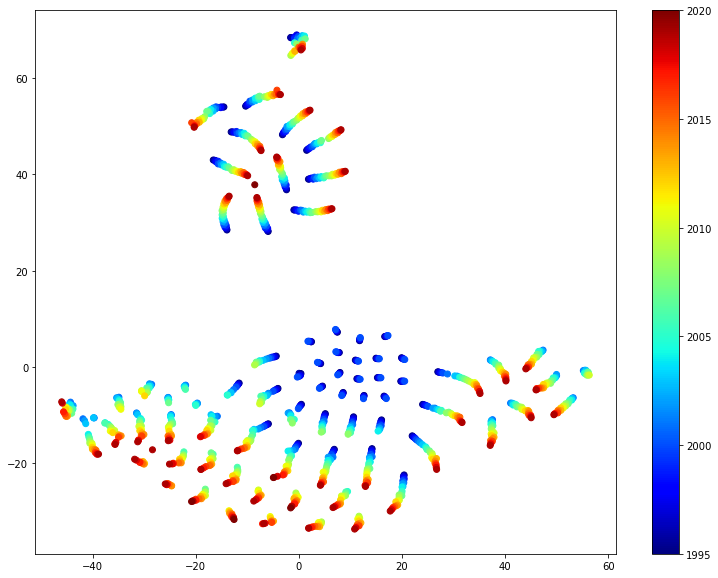

In [44]:
plt.figure(figsize= (13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c= X['year'][::12,], cmap='jet')

plt.colorbar()
plt.show()